First, we need to get the data. I downloaded from kaggle using
kaggle competitions download -c house-prices-advanced-regression-techniques in terminal

In [51]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import StratifiedShuffleSplit

In [52]:
df = pd.read_csv('/Users/jackmayr/PycharmProjects/my_juypter_notebooks/hands_on_ML/data/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [55]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


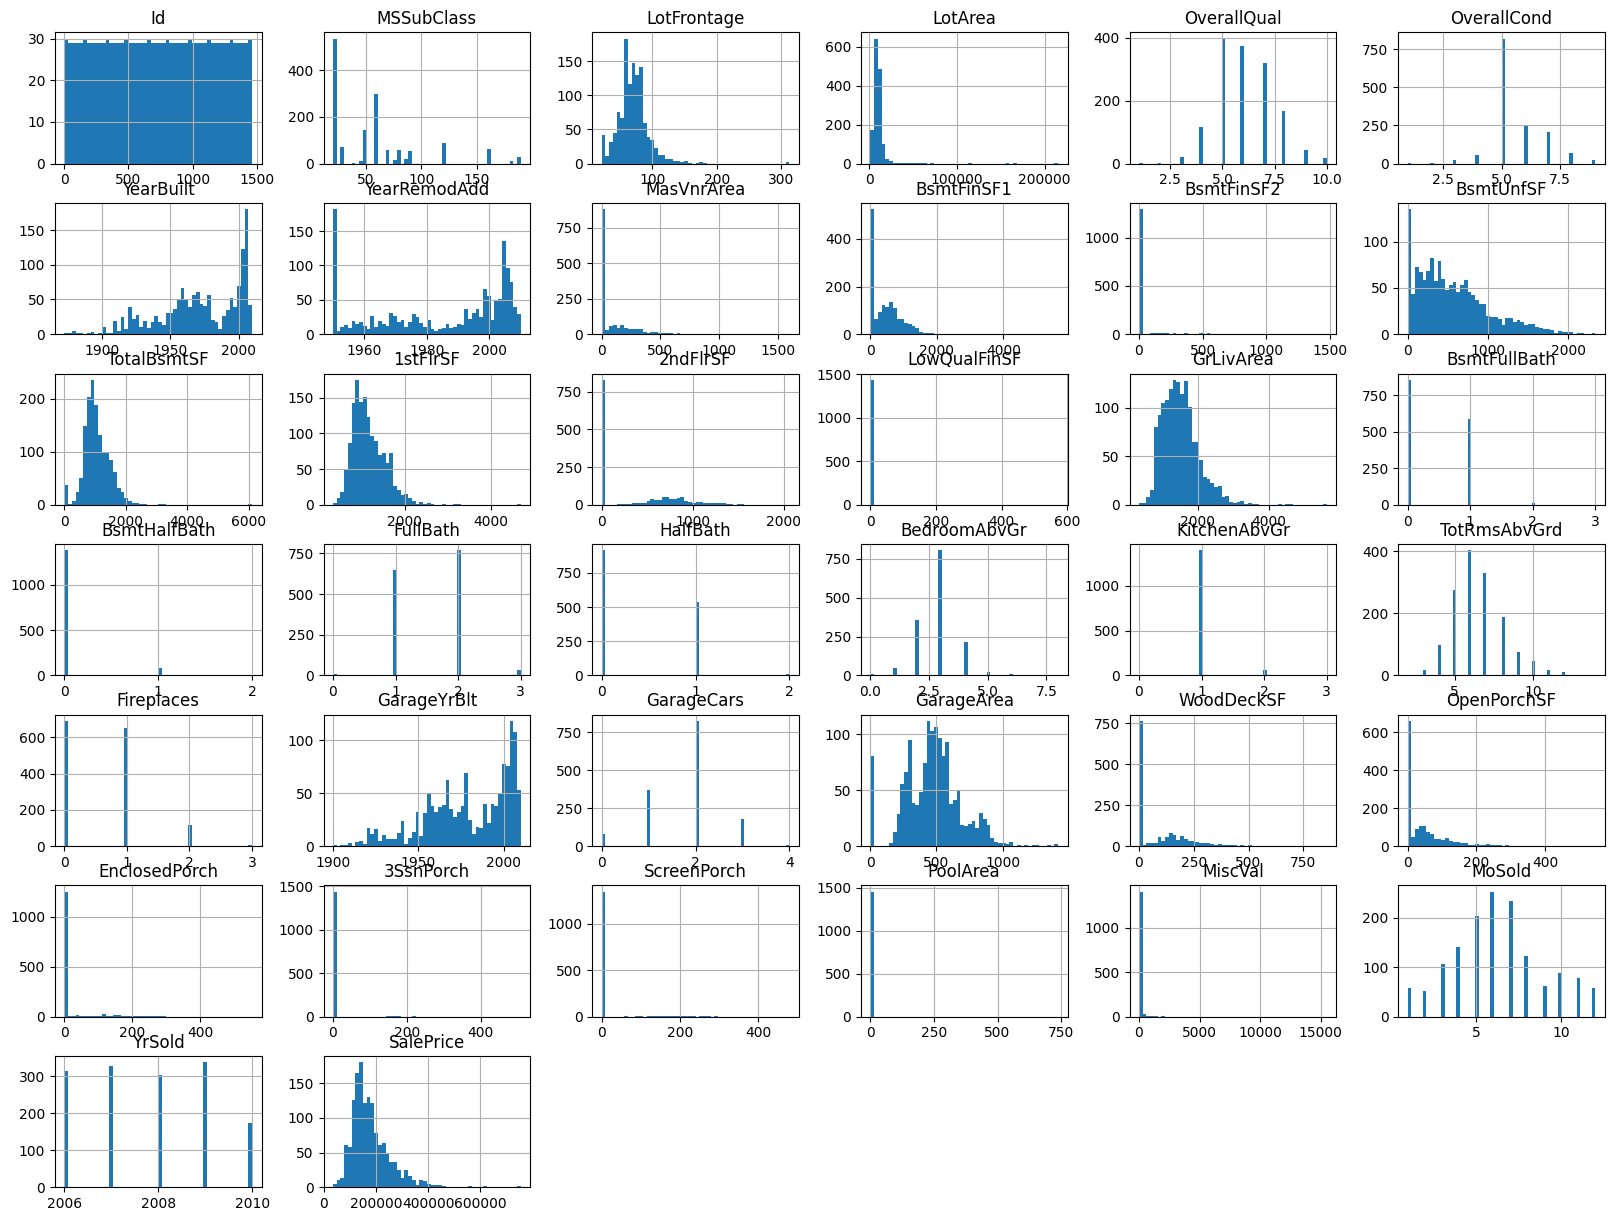

In [56]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [57]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size= .30, train_size = .70, random_state=42, shuffle=True, stratify=None)


In [58]:
print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)


X_train = (1021, 80)
X_test = (438, 80)
y_train = (1021,)
y_test = (438,)


<Axes: >

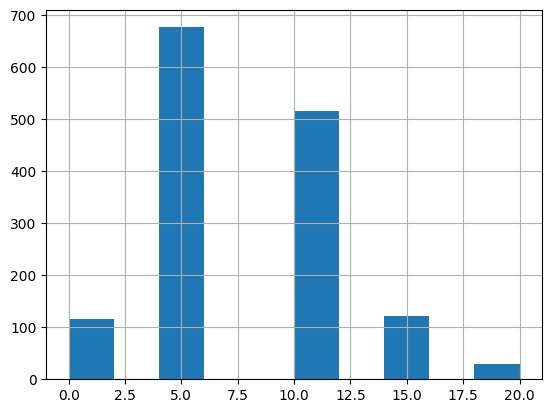

In [59]:
df['room_cat'] = pd.cut(df['TotRmsAbvGrd'], bins=[0., 4, 6, 8, 10, np.inf], labels = [0., 5, 10, 15, 20])
df['room_cat'].hist()

In [60]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['room_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [61]:
strat_test_set["room_cat"].value_counts() / len(strat_test_set)

5.0     0.463470
10.0    0.353881
15.0    0.084475
0.0     0.077626
20.0    0.020548
Name: room_cat, dtype: float64

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <Axes: xlabel='LotArea', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='TotRmsAbvGrd'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='TotRmsAbvGrd'>,
        <Axes: xlabel='LotArea', ylabel='TotRmsAbvGrd'>],
       [<Axes: xlabel='SalePrice', ylabel='LotArea'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='LotArea'>,
        <Axes: xlabel='LotArea', ylabel='LotArea'>]], dtype=object)

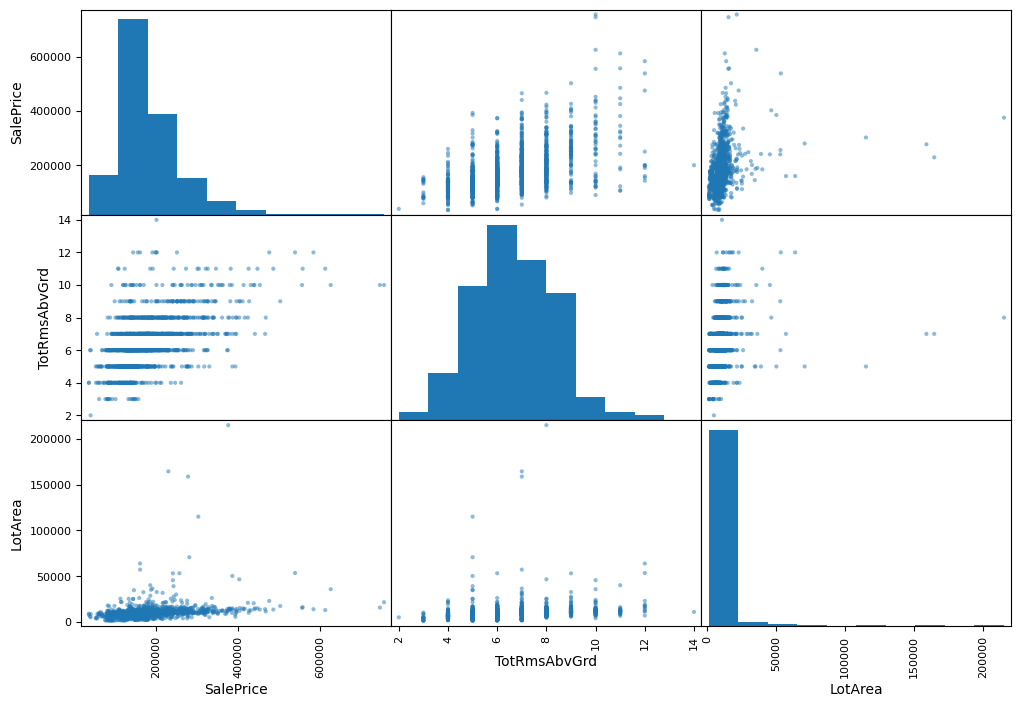

In [62]:
attributes = ['SalePrice', 'TotRmsAbvGrd', 'LotArea']
scatter_matrix(df[attributes], figsize=(12,8))

In [63]:
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

/var/folders/78/6y5fpy1j5hlbymrj4fxqkkz40000gn/T/ipykernel_62327/134272842.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Numerical transformation pipelines

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [69]:
imputer = SimpleImputer(strategy='median')

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])



If the data was ordinal (categorical but some values were 'better' than others, you could use sklearns ordinalencoder (see pg 66 of hands on ML)

Can also use OneHot encoding for categorical values (see pg 67 of hands on ML). sklearn creates a sciPy sparse matrix which uses less storage when most of the 2d array is just zeros

See pg 68-71 for info about transformers. sklearn.compose Column Transformer is able to manipulate numerical and categorical data in one step

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [78]:
print(X_train.select_dtypes(include=['float64','int64']))

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
135    136          20         80.0    10400            7            6   
1452  1453         180         35.0     3675            5            5   
762    763          60         72.0     8640            7            5   
932    933          20         84.0    11670            9            5   
435    436          60         43.0    10667            7            6   
...    ...         ...          ...      ...          ...          ...   
1044  1045          20         80.0     9600            8            5   
1095  1096          20         78.0     9317            6            5   
1130  1131          50         65.0     7804            4            3   
1294  1295          20         60.0     8172            5            7   
860    861          50         55.0     7642            7            8   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
135        1970          1970       2

In [127]:
print(df.drop(columns = ['SalePrice']))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [159]:

num_attribs = X.select_dtypes(exclude='object').columns
cat_attribs = X.select_dtypes(include='object').columns
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs),
])
X_train_prepped = full_pipeline.fit_transform(X_train)

In [133]:
print(X_train_prepped)

  (0, 0)	-1.3999964787139734
  (0, 1)	-0.8680059237382338
  (0, 2)	0.42022975363111303
  (0, 3)	-0.03110576871813909
  (0, 4)	0.6364681895591364
  (0, 5)	0.3916257643627251
  (0, 6)	-0.031236619059550153
  (0, 7)	-0.7106466113528171
  (0, 8)	1.06100623446728
  (0, 9)	-0.9714070900651404
  (0, 10)	-0.28048320358541906
  (0, 11)	1.6473533057735363
  (0, 12)	0.5466800332527292
  (0, 13)	1.316608545483512
  (0, 14)	-0.8029399986248105
  (0, 15)	-0.12037300732883542
  (0, 16)	0.2877417236434063
  (0, 17)	-0.8149579928024939
  (0, 18)	-0.24779147249477196
  (0, 19)	0.7684381532313104
  (0, 20)	-0.7591022535602739
  (0, 21)	0.13411295109796031
  (0, 22)	-0.21242638256958857
  (0, 23)	0.279381336391869
  (0, 24)	0.5946341062756837
  :	:
  (1020, 168)	1.0
  (1020, 174)	1.0
  (1020, 175)	1.0
  (1020, 184)	1.0
  (1020, 189)	1.0
  (1020, 194)	1.0
  (1020, 201)	1.0
  (1020, 208)	1.0
  (1020, 211)	1.0
  (1020, 218)	1.0
  (1020, 222)	1.0
  (1020, 226)	1.0
  (1020, 230)	1.0
  (1020, 238)	1.0
  (1020, 

Now it is time to create our model / models. First will be a linear regression

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
line_reg = LinearRegression()
line_reg.fit(X_train_prepped, y_train)

LinearRegression()

In [136]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepped = full_pipeline.transform(some_data)
print('predictions: ', line_reg.predict(some_data_prepped))

predictions:  [177594.38192901 124590.90117313 228024.65050828 311949.89302517
 230839.87416252]


In [137]:
print('labels: ', list(some_labels))

labels:  [174000, 145000, 215200, 320000, 212000]


measure accuracy with RMSE

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
preds = line_reg.predict(X_train_prepped)
line_mse = mean_squared_error(y_train, preds)
line_rmse = np.sqrt(line_mse)
print(line_rmse)

18886.904991681215


Lets try a Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepped, y_train)

DecisionTreeRegressor()

In [142]:
dtree_preds = tree_reg.predict(X_train_prepped)
tree_mse = mean_squared_error(y_train, dtree_preds)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


We overfit

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
scores = cross_val_score(tree_reg, X_train_prepped, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [145]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

In [146]:
display_scores(tree_rmse_scores)

Scores:  [71249.94491607 41574.2053351  42454.06646889 45077.92866455
 45623.87803445 41140.61291688 37223.20408209 38268.31469823
 40869.65031467 40637.34133822]
Mean:  44411.914676916065
Standard Deviation:  9278.986461163833


In [147]:
lin_scores = cross_val_score(line_reg, X_train_prepped, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [ 35016.67957289  23215.42938949  48361.74404918 121715.04118119
  30180.37426203  47268.60359118  26315.1625287   21210.87008157
  50464.37932931  28682.26686447]
Mean:  43243.05508500054
Standard Deviation:  28063.866616315747


Lets try random forest regressors

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prepped, y_train)
forest_scores = cross_val_score(forest_reg, X_train_prepped, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [37255.17461061 23245.68184264 43641.46696105 44735.21317584
 34933.45576159 25587.67436471 26979.36331426 24341.1865979
 27825.65534728 25249.00930902]
Mean:  31379.38812849074
Standard Deviation:  7711.686521657631


lets save our models

In [150]:
import joblib

In [151]:
# joblib.dump(my_model, "my_model.pkl")
# and later...
# my_model_loaded = joblib.load("my_model.pkl

hyperparameter tuning with gridsearch

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepped, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [154]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [155]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [156]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51988.75638789521 {'max_features': 2, 'n_estimators': 3}
40849.16043043446 {'max_features': 2, 'n_estimators': 10}
39098.16008751937 {'max_features': 2, 'n_estimators': 30}
48137.91958049511 {'max_features': 4, 'n_estimators': 3}
40772.83532741122 {'max_features': 4, 'n_estimators': 10}
37199.30338899887 {'max_features': 4, 'n_estimators': 30}
44987.45077715162 {'max_features': 6, 'n_estimators': 3}
37500.65708009375 {'max_features': 6, 'n_estimators': 10}
37040.00625188345 {'max_features': 6, 'n_estimators': 30}
40284.93762256002 {'max_features': 8, 'n_estimators': 3}
38202.011532789365 {'max_features': 8, 'n_estimators': 10}
34959.54824142921 {'max_features': 8, 'n_estimators': 30}
45173.03791183473 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
40166.05447512998 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
45901.94704668284 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
40671.28026307552 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

lets see importance scores with attributes

In [157]:
feat_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_['cat']
cat_attribs = list(cat_encoder.categories_[0])

attributes = list(num_attribs) + cat_attribs

sorted(zip(feat_importances, attributes), reverse=True)

[(0.08376221648315262, 'OverallQual'),
 (0.03957947908069849, 'GarageArea'),
 (0.035590546286290686, 'GarageYrBlt'),
 (0.03236004906272843, 'TotalBsmtSF'),
 (0.030455540580890134, 'LotArea'),
 (0.02995541025466934, '1stFlrSF'),
 (0.02978529267335527, 'BsmtFinSF1'),
 (0.02974720683492103, 'GrLivArea'),
 (0.022218676245732604, 'MasVnrArea'),
 (0.021622297838341437, 'FullBath'),
 (0.021327162238650815, 'YearBuilt'),
 (0.021042535487497724, 'TotRmsAbvGrd'),
 (0.020996456419134186, '2ndFlrSF'),
 (0.01627955801502468, 'WoodDeckSF'),
 (0.01516177376983533, 'Fireplaces'),
 (0.015158864102344521, 'GarageCars'),
 (0.014232600030060527, 'YearRemodAdd'),
 (0.013852906300322354, 'LotFrontage'),
 (0.012707915475858856, 'BsmtUnfSF'),
 (0.012374505600764786, 'HalfBath'),
 (0.0076930656227143955, 'OpenPorchSF'),
 (0.007510851798707217, 'MSSubClass'),
 (0.006075479395410431, 'BedroomAbvGr'),
 (0.006069668051030866, 'Id'),
 (0.005784403627022997, 'MoSold'),
 (0.005092152166301341, 'OverallCond'),
 (0.004

can drop less useful features

time to evaluate on the test set

In [161]:
final_model = grid_search.best_estimator_

X_test_prepped = full_pipeline.transform(X_test)
final_preds = final_model.predict(X_test_prepped)
final_mse = mean_squared_error(y_test, final_preds)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

32526.110595568945


In [162]:
from scipy import stats

In [164]:
confidence = 0.95
squared_errors = (final_preds - y_test)**2
print(np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))))

[24191.33270396 39123.84391847]
